In [1]:
import pandas as pd
import cantera as ct
from typing import Optional
from sdtoolbox.postshock import CJspeed
from funcs.simulation import thermo
import seaborn as sns
from matplotlib import pyplot as plt
from uncertainties import unumpy as unp
import uncertainties as un
import numpy as np


FUEL = "CH4"
OXIDIZER = "N2O"
MECH = "gri30.cti"

In [2]:
# with pd.HDFStore("simulated_and_measured.h5", "r") as store:
#     df = store.data
    
with pd.HDFStore("simulated_and_measured_with_cj.h5", "r") as store:
    df = store.data
    
df

,diluent,phi_nom,dil_mf_nom,p_0,u_p_0,t_0,phi,u_phi,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cell_size_measured,u_cell_size_measured,cell_size_gavrikov,cell_size_ng,cell_size_westbrook,cj
0,CO2,0.4,0.10,101393.842884,2.307000,289.846188,0.419182,0.000208,0.103943,0.000040,1780.064483,1.212763,17.711596,0.480062,770.810052,74.459337,40.577703,1876.643937
1,CO2,0.4,0.15,101400.200470,1.609842,290.021614,0.416662,0.000215,0.154795,0.000036,1742.324854,1.161985,26.122865,0.479481,2328.318780,137.733125,76.176883,1821.116774
2,CO2,0.4,0.20,101383.316513,1.976709,290.005443,0.425508,0.000378,0.207642,0.000063,1680.937965,1.326527,45.265852,0.594380,7173.643295,262.627217,148.643042,1768.319214
3,CO2,0.7,0.10,101393.617108,2.121143,289.767941,0.735369,0.000243,0.104023,0.000045,1944.385714,1.446872,11.744907,0.530100,275.832035,41.773144,24.192077,1992.950604
4,CO2,0.7,0.15,101412.528953,2.179424,289.308769,0.730354,0.000250,0.154600,0.000045,1884.805654,1.665023,14.199823,0.512883,777.986099,72.212132,43.211558,1932.781705
5,CO2,0.7,0.20,101412.244820,1.938748,290.890143,0.739247,0.000282,0.207012,0.000045,1808.159887,1.251217,22.565446,0.478742,2342.272709,127.963220,79.797353,1875.089129
6,CO2,1.0,0.10,101396.288279,2.719599,290.170199,1.048230,0.000235,0.103722,0.000039,2030.771107,1.578345,10.729874,0.408369,213.161962,33.742735,19.590121,2077.113953
7,CO2,1.0,0.15,101404.272743,1.800340,290.141360,1.048723,0.000231,0.154530,0.000037,1965.920228,1.479180,13.662187,0.480046,668.234272,56.702087,34.275813,2013.021349
8,CO2,1.0,0.20,101410.128009,1.557379,290.441929,1.052847,0.000288,0.206571,0.000042,1907.275986,1.392106,18.601504,0.484546,2103.742085,98.650499,62.648736,1949.031190
9,N2,0.4,0.10,101368.606788,2.121188,289.359526,0.416727,0.000224,0.180426,0.000041,1880.070432,1.657319,15.263125,0.601509,275.935516,47.345764,24.757695,1926.494347


In [3]:
# def get_ct_solution(row: pd.Series) -> ct.Solution:
#     global MECH, FUEL, OXIDIZER
#     gas = ct.Solution(MECH)
#     gas.TP = row["t_0"], row["p_0"]
#     gas.set_equivalence_ratio(row["phi"], FUEL, OXIDIZER)
#     new_mole_fractions = thermo.diluted_species_dict(
#         spec=gas.mole_fraction_dict(),
#         diluent=row["diluent"],
#         diluent_mol_frac=row["dil_mf"],
#     )
#     gas.X = new_mole_fractions
    
#     return gas

In [4]:
# def calculate_cj_speed(row: pd.Series) -> float:
#     gas = get_ct_solution(row)
    
#     return CJspeed(
#         P1=row["p_0"],
#         T1=row["t_0"],
#         q=gas.mole_fraction_dict(),
#         mech=MECH
#     )

In [5]:
# df["cj"] = df.apply(calculate_cj_speed, axis=1)
# df

In [6]:
# with pd.HDFStore("simulated_and_measured_with_cj.h5", "w") as store:
#     store["data"] = df

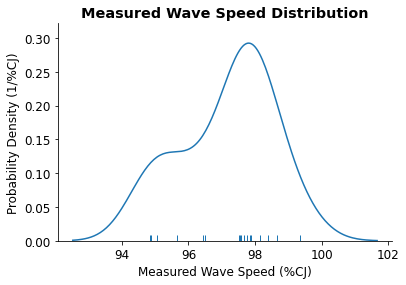

In [7]:
pct_cj = df["wave_speed"].div(df["cj"]).mul(100)
sns.kdeplot(pct_cj)
sns.rugplot(pct_cj, color="C0")
plt.xlabel("Measured Wave Speed (%CJ)")
plt.ylabel("Probability Density (1/%CJ)")
plt.title("Measured Wave Speed Distribution", weight="bold")
sns.despine()

In [8]:
pct_cj.name = "Wave Speed (%CJ)"
pd.concat((df[["diluent", "phi_nom", "dil_mf_nom"]], pct_cj.to_frame()), axis=1).to_clipboard()

In [9]:
print(f"min:  {pct_cj.min():5.2f}%")
print(f"max:  {pct_cj.max():5.2f}%")
print(f"mean: {pct_cj.mean():5.2f}%")
print(f"std:  {pct_cj.std():5.2f}%")

min:  94.85%
max:  99.34%
mean: 97.16%
std:   1.36%


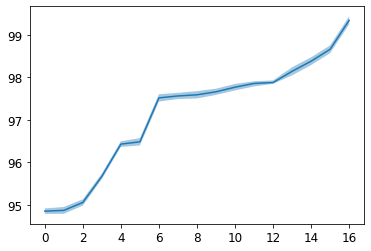

In [18]:
pct_cj_with_uncert = unp.uarray(df["wave_speed"], df["u_wave_speed"]) / df["cj"] * 100
nominal = unp.nominal_values(pct_cj_with_uncert)
std = unp.std_devs(pct_cj_with_uncert)
plt.fill_between(range(len(std)), sorted(nominal + std), sorted(nominal - std), alpha=0.4)
plt.plot(range(len(std)), sorted(nominal))

In [27]:
pct_cj_with_uncert.sum() / len(pct_cj_with_uncert) + un.ufloat(0, np.std(nominal))

97.16083365508628+/-1.3226415219432208